In [72]:
import sklearn 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn import datasets
from math import sqrt

In [81]:
#Step 1: create 3 clusters of data
#j = 1: red, j = 2: green, j = 3: blue

#Generate Data
mu1 = [1, 0]
mu2 = [-1, 0]
mu3 = [0, -10]

U = np.asarray([[1/sqrt(2), 1/sqrt(2)], [-1/sqrt(2), 1/sqrt(2)]])
lam1 = np.asarray([[4,0], [0,1]])
lam2 = np.asarray([[1, 0], [0, 5]])

sig1 = U @ lam1 @ U.transpose()
sig2 = U @ lam2 @ U.transpose()
sig3 = np.identity(2)

c1 = np.random.multivariate_normal(mu1, sig1, 1000)
c2 = np.random.multivariate_normal(mu2, sig2, 1000)
c3 = np.random.multivariate_normal(mu3, sig3, 1000)

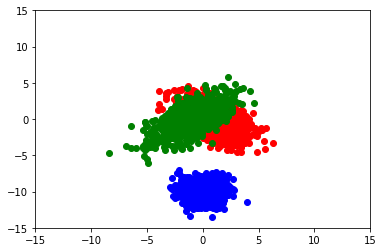

In [82]:
plt.scatter(c1[:,0], c1[:,1], color = 'red')
plt.scatter(c2[:,0], c2[:,1], color = 'green')
plt.scatter(c3[:,0], c3[:,1], color = 'blue')
plt.ylim((-15,15))
plt.xlim((-15,15))
plt.show()

In [113]:
#k means 
#distance function using Euclidean Distance (2D)
def getDistance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

#calculate centroid
#Make sure C has samples in rows
def getCentroid(C):
    return np.array([1,1])
    #return np.array(np.mean(C[0,:]), np.mean(C[1,:]))

In [104]:
#k means function
#Again make sure it's samples in columns and each row is a dimension
def kMeans3(C, maxIters, tol):
    #C is data, K is number of clusters
    #initialize 3 clusters randomly
    np.random.shuffle(C.transpose())
    Cs = np.array_split(C.transpose(),3)
    C1 = Cs[0]
    C2 = Cs[1]
    C3 = Cs[2]
    #Random clusters then get centroids
    u1 = getCentroid(C1)
    u2 = getCentroid(C2)
    u3 = getCentroid(C3)

    u1_prev = 0
    u2_prev = 0
    u3_prev = 0
    iters = 0
    #Stop when clusters don't change
    
    
    while abs(np.linalg.norm(np.array([u1 - u1_prev, u2-u2_prev, u3-u3_prev]))) > tol or iters > maxIters:
        
        u1_prev = u1
        u2_prev = u2
        u3_prev = u3
        d1 = []
        d2 = []
        d3 = []

        c1_n = []
        c2_n = []
        c3_n = []
        #Get distance vectors
        for i in range(len(C[0])):
            d1.append(np.linalg.norm(C[:,i], u1))
            d2.append(np.linalg.norm(C[:,i], u2))
            d3.append(np.linalg.norm(C[:,i], u3))
            
        distances = np.vstack((d1,d2,d3))
        #Generate new clusters

        for i in range(len(distances[0])):
            index = list(distances[:,i]).index(min(distances[:,i]))
            if index == 1:
                c1_n.append(C[:,i])
            elif index == 2:
                c2_n.append(C[:,i])
            elif index == 3:
                c3_n.append(C[:,i])
        
        C1 = c1_n
        C2 = c2_n
        C3 = c3_n
        print(C1)
        #Calculate new centroids
        
        u1 = getCentroid(C1)
        u2 = getCentroid(C2)
        u3 = getCentroid(C3)
        
        iters += 1
    
    return (u1,u2,u3)
    

In [109]:
_C = np.vstack((c1,c2,c3))


In [114]:
print(kMeans3(_C.transpose(), 10, 0.1))

/home/tristan/Projects/ML-Jupyter-NBs/MLClass/lib/python3.7/site-packages/numpy/linalg/linalg.py:2352: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (ord in ('f', 'fro') and ndim == 2) or


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()